In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv


Load data

In [3]:
df = pd.read_csv('/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv')

In [4]:
print('Dimension of dataset= ', df.shape)
df.head()

Dimension of dataset=  (4080, 4)


,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
print('Dimension of dataset =', df.shape)
print('\nColumn names:')
print(df.columns)
print('\nFirst few rows:')
print(df.head())
print('\nBasic info:')
print(df.info())
print('\nSummary statistics:')
print(df.describe())

Dimension of dataset = (4080, 4)

Column names:
Index(['species', 'length', 'weight', 'w_l_ratio'], dtype='object')

First few rows:
              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None

Summary statistics:
            length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782

In [7]:
# Checking missing values
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


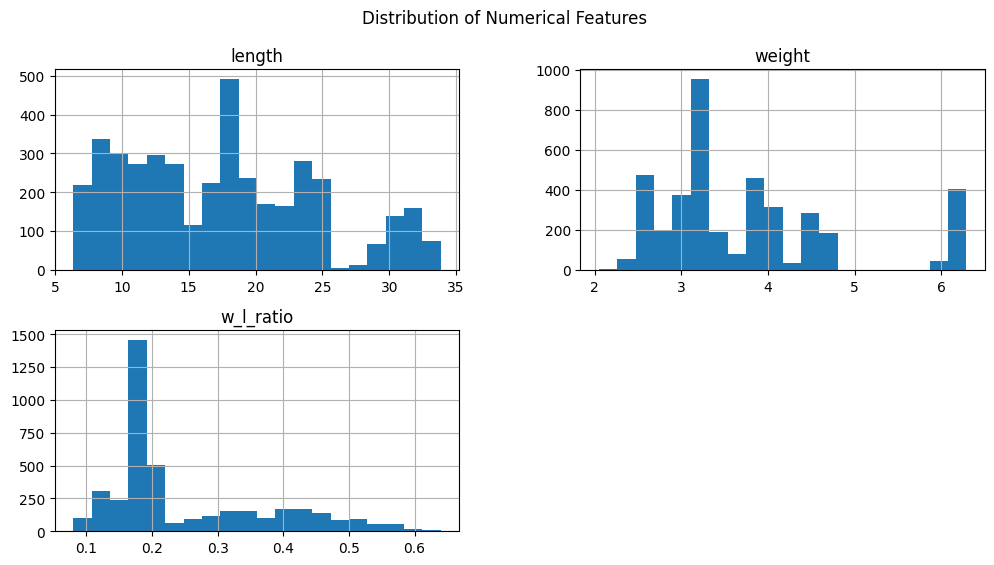

In [8]:
#Visualize the distribution of numerical features
numerical_features = ['length', 'weight', 'w_l_ratio']
df[numerical_features].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

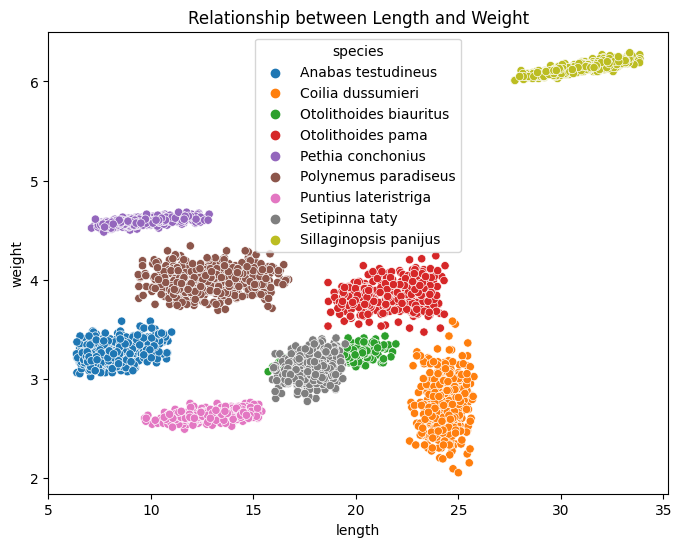

In [9]:
#Visualize the relationship between length and weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='length', y='weight', hue='species')
plt.title('Relationship between Length and Weight')
plt.show()

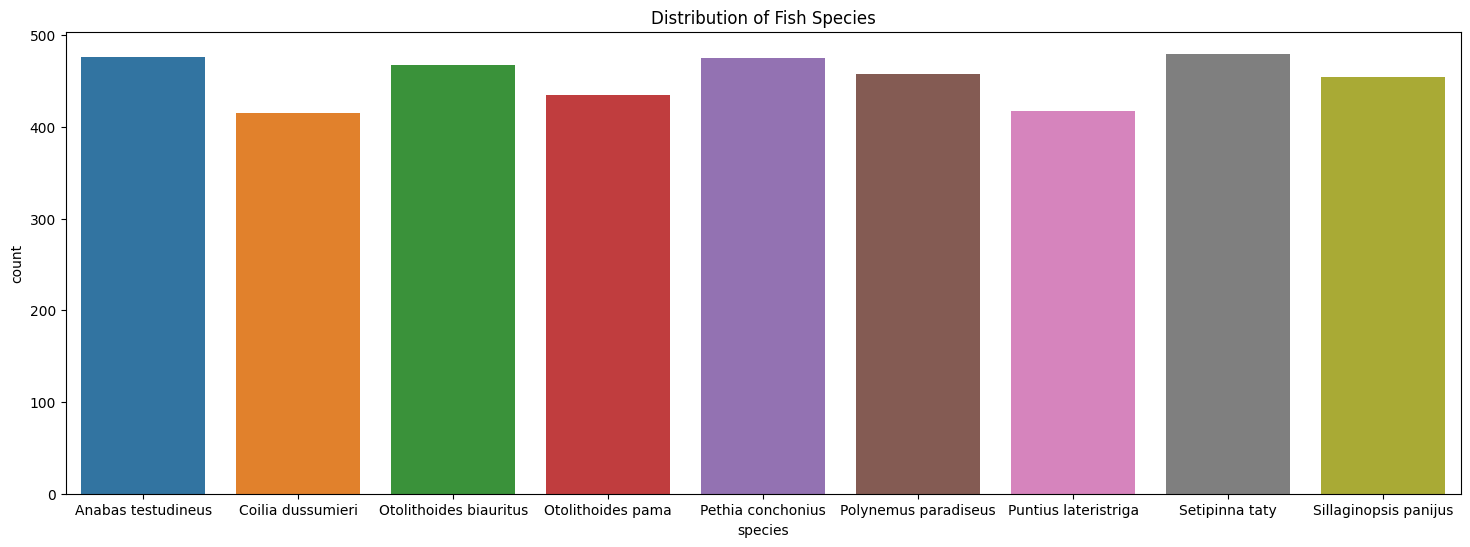

In [10]:
#Visualize the distribution of species
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='species')
plt.title('Distribution of Fish Species')
plt.show()

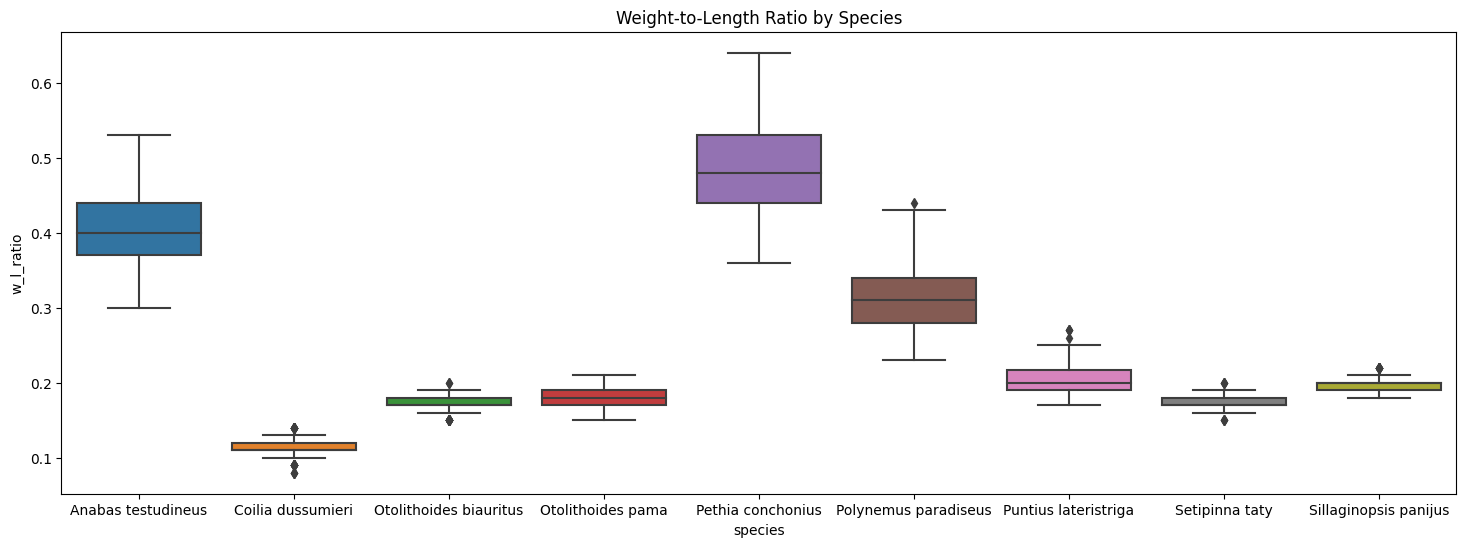

In [11]:
#Analyze weight-to-length ratio by species
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x='species', y='w_l_ratio')
plt.title('Weight-to-Length Ratio by Species')
plt.show()

In [12]:
# Encode categorical variables, One-hot encoding for the 'species' column
df_encoded = pd.get_dummies(df, columns=['species'], drop_first=True)


#Algorithms like linear regression, decision trees, or neural networks cannot directly process categorical data.
#The species column is categorical, so it needs to be encoded

In [13]:
print(df['species'].unique())

['Anabas testudineus' 'Coilia dussumieri' 'Otolithoides biauritus'
 'Otolithoides pama' 'Pethia conchonius' 'Polynemus paradiseus'
 'Puntius lateristriga' 'Setipinna taty' 'Sillaginopsis panijus']


In [14]:
# #Encode categorical variables with drop_first=True
# df_encoded = pd.get_dummies(df, columns=['species'], drop_first=True)

# print('\nPreprocessed dataset:')
# print(df_encoded.head())

In [15]:
df_encoded = pd.get_dummies(df, columns=['species'], drop_first=False)

#Algorithms like linear regression, decision trees, or neural networks cannot directly process categorical data.
#The species column is categorical, so it needs to be encoded

In [16]:
#Display the preprocessed dataset
print('\nPreprocessed dataset:')
print(df_encoded.head())


Preprocessed dataset:
   length  weight  w_l_ratio  species_Anabas testudineus  \
0   10.66    3.45       0.32                        True   
1    6.91    3.27       0.47                        True   
2    8.38    3.46       0.41                        True   
3    7.57    3.36       0.44                        True   
4   10.83    3.38       0.31                        True   

   species_Coilia dussumieri  species_Otolithoides biauritus  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   

   species_Otolithoides pama  species_Pethia conchonius  \
0                      False                      False   
1                      False                      False   
2                      False                      Fals

## Regression Model for Length and Weight

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
# Step 1: Prepare the features (X) and targets (y)
X = df_encoded.drop(columns=['length', 'weight'])  # Features (remove target columns)
y_length = df_encoded['length']  # Target for length
y_weight = df_encoded['weight']  # Target for weight

In [19]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_length_train, y_length_test = train_test_split(X, y_length, test_size=0.2, random_state=42)
_, _, y_weight_train, y_weight_test = train_test_split(X, y_weight, test_size=0.2, random_state=42)

In [20]:

# Step 3: Train Random Forest Regressor for Length
length_model = RandomForestRegressor(n_estimators=100, random_state=42)
length_model.fit(X_train, y_length_train)

RandomForestRegressor(random_state=42)

In [21]:
# Step 4: Train Random Forest Regressor for Weight
weight_model = RandomForestRegressor(n_estimators=100, random_state=42)
weight_model.fit(X_train, y_weight_train)

RandomForestRegressor(random_state=42)

In [22]:
# Step 5: Make predictions
y_length_pred = length_model.predict(X_test)
y_weight_pred = weight_model.predict(X_test)

In [23]:
# Step 6: Evaluate the model performance
length_mse = mean_squared_error(y_length_test, y_length_pred)
weight_mse = mean_squared_error(y_weight_test, y_weight_pred)

In [24]:
print(f'Mean Squared Error for Length Prediction: {length_mse}')
print(f'Mean Squared Error for Weight Prediction: {weight_mse}')

Mean Squared Error for Length Prediction: 0.24140901292885453
Mean Squared Error for Weight Prediction: 0.007839078499475101


Hyperparameter Tuning with GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [63]:
# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Randomized search for length model
grid_search_length = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_length.fit(X_train, y_length_train)

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_length_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [29]:
print("Best parameters for Length Model:", grid_search_length.best_params_)
print("Best score for Length Model:", grid_search.best_score_)

Best parameters for Length Model: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Length Model: 0.9942346423434779


Updated Model Training with Optimized Parameters:

In [30]:
# Train Random Forest Regressor with the best parameters for Length Prediction
best_length_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

best_length_model.fit(X_train, y_length_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [31]:
# Predict on the test set
y_length_pred_optimized = best_length_model.predict(X_test)

# Evaluate the optimized model
length_mse_optimized = mean_squared_error(y_length_test, y_length_pred_optimized)
print(f'Optimized Mean Squared Error for Length Prediction: {length_mse_optimized}')

Optimized Mean Squared Error for Length Prediction: 0.24131816471030085


Neural Network for Model Variants 

In [32]:
!pip install tensorflow

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Data Preprocessing

In [34]:
X = df_encoded.drop(columns=['length', 'weight'])  # Features (remove target columns)
y_length = df_encoded['length'] 
y_weight = df_encoded['weight']  

# X = df_encoded.drop(columns=['length', 'width'])  # Features (remove target columns)
# y_length = df_encoded['length']  
# y_width = df_encoded['width'] 

In [35]:
# Split data into training and testing sets
X_train, X_test, y_length_train, y_length_test = train_test_split(X, y_length, test_size=0.2, random_state=42)
_, _, y_weight_train, y_weight_test = train_test_split(X, y_weight, test_size=0.2, random_state=42)

In [36]:
#Scaling features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

# Building Neural Network for Length Prediction

In [64]:
# Building Neural Network for Length Prediction
length_nn_model = Sequential()

# Input layer with Input() for better practice
length_nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
length_nn_model.add(Dense(units=64, activation='relu'))  # Hidden layer 1
length_nn_model.add(Dense(units=32, activation='relu'))  # Hidden layer 2
length_nn_model.add(Dense(units=1))  # Output layer

In [65]:
# Compile the model

length_nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [66]:
# Train the model
#length_nn_model.fit(X_train_scaled, y_length_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

history = length_nn_model.fit(X_train_scaled, y_length_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 293.6003 - mae: 15.5118 - val_loss: 100.5957 - val_mae: 8.1135
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.8762 - mae: 4.4523 - val_loss: 1.6657 - val_mae: 0.9965
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2335 - mae: 0.8893 - val_loss: 0.8569 - val_mae: 0.7381
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8049 - mae: 0.7221 - val_loss: 0.7761 - val_mae: 0.6902
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7422 - mae: 0.6823 - val_loss: 0.7202 - val_mae: 0.6545
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6642 - mae: 0.6373 - val_loss: 0.6985 - val_mae: 0.6456
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6234 - mae: 0.6095 - val_loss: 0.6484 - val_mae: 0.6129
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6325 - mae: 0.5965 - val_loss: 0.6194 - val_mae: 0.5888
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

Model is overfitting.

In [67]:
# Building a simpler neural network for Length Prediction
length_nn_model = Sequential()

# Input layer with fewer neurons in the first hidden layer
length_nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
length_nn_model.add(Dense(units=32, activation='relu'))  # Hidden layer with fewer neurons
length_nn_model.add(Dense(units=1))  # Output layer

In [71]:
# Compile the model again
length_nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = length_nn_model.fit(X_train_scaled, y_length_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = length_nn_model.evaluate(X_test_scaled, y_length_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 323.0870 - mae: 16.6371 - val_loss: 303.9485 - val_mae: 15.9718
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259.3054 - mae: 14.6355 - val_loss: 236.2415 - val_mae: 13.7808
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.1209 - mae: 12.2689 - val_loss: 166.0477 - val_mae: 11.0840
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.3707 - mae: 9.5958 - val_loss: 106.1869 - val_mae: 8.1886
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.6725 - mae: 6.9148 - val_loss: 64.2030 - val_mae: 5.6238
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.7967 - mae: 4.9558 - val_loss: 38.3327 - val_mae: 3.9773
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.0975 - mae: 4.0009 - val_loss: 21.8459 - val_mae: 2.9177
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7299 - mae: 3.1607 - val_loss: 11.9135 - val_mae: 2.1300
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━

In [69]:
from tensorflow.keras.layers import Dropout

length_nn_model = Sequential()
length_nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
length_nn_model.add(Dense(units=32, activation='relu'))  # Hidden layer
length_nn_model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
length_nn_model.add(Dense(units=1))  # Output layer

In [72]:
# Compile the model again
length_nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = length_nn_model.fit(X_train_scaled, y_length_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae = length_nn_model.evaluate(X_test_scaled, y_length_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1064 - mae: 1.7462 - val_loss: 0.6779 - val_mae: 0.6014
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1877 - mae: 1.7331 - val_loss: 0.6437 - val_mae: 0.5903
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7101 - mae: 1.8233 - val_loss: 0.6998 - val_mae: 0.6202
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9365 - mae: 1.7548 - val_loss: 0.6809 - val_mae: 0.5882
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7632 - mae: 1.8708 - val_loss: 0.7502 - val_mae: 0.6300
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0665 - mae: 1.7783 - val_loss: 0.7333 - val_mae: 0.6114
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6253 - mae: 1.7004 - val_loss: 0.8325 - val_mae: 0.6592
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7430 - mae: 1.6794 - val_loss: 0.6365 - val_mae: 0.5698
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.507

In [73]:
# # Set up EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = length_nn_model.fit(X_train_scaled, y_length_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6078 - mae: 1.2176 - val_loss: 0.4394 - val_mae: 0.4795
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5450 - mae: 1.2582 - val_loss: 0.4819 - val_mae: 0.4863
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4065 - mae: 1.2097 - val_loss: 0.5456 - val_mae: 0.5163
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4474 - mae: 1.1800 - val_loss: 0.4735 - val_mae: 0.5027
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1384 - mae: 1.1641 - val_loss: 0.4826 - val_mae: 0.4849
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2749 - mae: 1.2859 - val_loss: 0.4559 - val_mae: 0.4818
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7993 - mae: 1.2498 - val_loss: 0.4728 - val_mae: 0.4848
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9171 - mae: 1.2157 - val_loss: 0.4197 - val_mae: 0.4673
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.454

In [74]:
# Predict on the test set
y_length_pred = length_nn_model.predict(X_test_scaled)

# Display the first few predictions
print(y_length_pred[:10])

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 8.283474 ]
 [17.857603 ]
 [20.047451 ]
 [11.3401   ]
 [ 7.8212056]
 [22.992355 ]
 [17.033545 ]
 [30.898024 ]
 [31.423807 ]
 [21.554535 ]]


In [75]:
# Compare the first few actual vs predicted values
for actual, predicted in zip(y_length_test[:10], y_length_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 8.74, Predicted: [8.283474]
Actual: 18.49, Predicted: [17.857603]
Actual: 18.66, Predicted: [20.047451]
Actual: 11.3, Predicted: [11.3401]
Actual: 7.97, Predicted: [7.8212056]
Actual: 22.91, Predicted: [22.992355]
Actual: 16.31, Predicted: [17.033545]
Actual: 30.57, Predicted: [30.898024]
Actual: 33.16, Predicted: [31.423807]
Actual: 20.59, Predicted: [21.554535]


In [76]:
from sklearn.metrics import mean_absolute_error, r2_score

# MAE
mae = mean_absolute_error(y_length_test, y_length_pred)
print(f'Mean Absolute Error: {mae}')

# R² Score
r2 = r2_score(y_length_test, y_length_pred)
print(f'R² Score: {r2}')


Mean Absolute Error: 0.43366231359687507
R² Score: 0.9930279974436406


Visualize the prediction

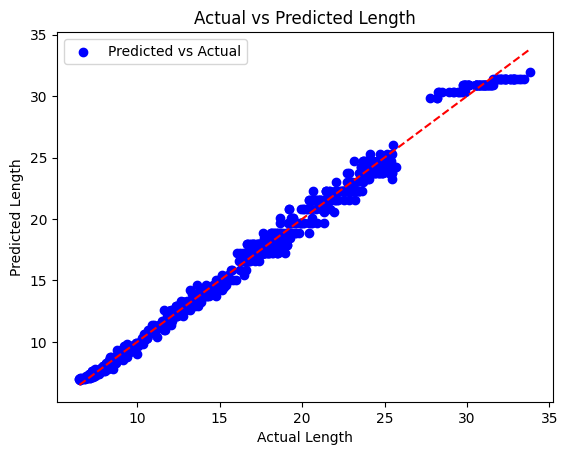

In [77]:
# Plot Actual vs Predicted values
plt.scatter(y_length_test, y_length_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Length')
plt.ylabel('Predicted Length')
plt.title('Actual vs Predicted Length')
plt.plot([min(y_length_test), max(y_length_test)], [min(y_length_test), max(y_length_test)], color='red', linestyle='--')
plt.legend()
plt.show()


In [78]:
# Evaluate the model
length_mse_nn = mean_squared_error(y_length_test, y_length_pred_nn) #mean square error
print(f'Mean Squared Error for Length Prediction (Neural Network): {length_mse_nn}')

Mean Squared Error for Length Prediction (Neural Network): 0.324898433541655


# Evaluating the weight prediction model

In [43]:
# Prepare the features (X) and targets (y) for weight prediction
y_weight_train, y_weight_test = train_test_split(df_encoded['weight'], test_size=0.2, random_state=42)

In [44]:
# Step 2: Build the Neural Network for Weight Prediction
weight_nn_model = Sequential()
weight_nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
weight_nn_model.add(Dense(units=64, activation='relu'))  # Hidden layer
weight_nn_model.add(Dense(units=32, activation='relu'))  # Another hidden layer
weight_nn_model.add(Dense(units=1))  # Output layer for predicting weight

In [45]:
# Step 3: Compile the model
weight_nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

In [46]:
# Step 3: Compile the model
weight_nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

In [47]:
# Step 5: Make predictions on the test set
y_weight_pred_nn = weight_nn_model.predict(X_test_scaled)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [48]:
# Step 1: Prepare the features (X) and targets (y) for weight prediction
y_weight_train, y_weight_test = train_test_split(df_encoded['weight'], test_size=0.2, random_state=42)

# Step 2: Build the Neural Network for Weight Prediction
weight_nn_model = Sequential()
weight_nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
weight_nn_model.add(Dense(units=64, activation='relu'))  # Hidden layer
weight_nn_model.add(Dense(units=32, activation='relu'))  # Another hidden layer
weight_nn_model.add(Dense(units=1))  # Output layer for predicting weight

# Step 3: Compile the model
weight_nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 4: Train the model
weight_nn_model.fit(X_train_scaled, y_weight_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Make predictions on the test set
y_weight_pred_nn = weight_nn_model.predict(X_test_scaled)

# Step 6: Evaluate the model on the test set
weight_mse_nn = mean_squared_error(y_weight_test, y_weight_pred_nn)
print(f'Mean Squared Error for Weight Prediction (Neural Network): {weight_mse_nn}')


Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.4648 - val_loss: 0.0261
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0202 - val_loss: 0.0187
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0179
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - val_loss: 0.0169
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - val_loss: 0.0169
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - val_loss: 0.0165
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: 0.0163
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - val_loss: 0.0157
Epoch 10/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - val_loss: 0.0156
Epoch 11/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 - val_loss: 0.0158
Epoch 12/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

Use Existing Dataset (For New Predictions):

Treat the remaining part of the dataset as new data for prediction. That is, after training and evaluating your models, you can use any new rows from the dataset (not used for training or validation) as "new data" for prediction.

In [49]:
# Using the whole dataset to make predictions
X_new = df_encoded.drop(columns=['length', 'weight'])
X_new_scaled = scaler.transform(X_new)

# Predict Length and Weight for all new samples in the dataset
predicted_length_new = length_nn_model.predict(X_new_scaled)
predicted_weight_new = weight_nn_model.predict(X_new_scaled)

# Display the predictions for new data
print(predicted_length_new)
print(predicted_weight_new)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[10.456504 ]
 [ 6.8937097]
 [ 7.9743032]
 ...
 [32.874992 ]
 [30.184772 ]
 [32.874992 ]]
[[3.345373 ]
 [3.3048608]
 [3.2996552]
 ...
 [6.2178636]
 [6.142837 ]
 [6.2178636]]


In [50]:
# Save predictions to CSV
predictions = pd.DataFrame({'Predicted_Length': predicted_length_new.flatten(), 'Predicted_Weight': predicted_weight_new.flatten()})
predictions.to_csv('predictions.csv', index=False)

In [51]:
# Load the saved predictions from the CSV file
predictions_loaded = pd.read_csv('predictions.csv')

# Display the first few rows of the loaded predictions
print(predictions_loaded.head())


   Predicted_Length  Predicted_Weight
0         10.456504          3.345373
1          6.893710          3.304861
2          7.974303          3.299655
3          7.400290          3.307247
4         10.832466          3.331013


In [53]:
#check outliers 

print(predictions_loaded.describe())

       Predicted_Length  Predicted_Weight
count       4080.000000       4080.000000
mean          17.526840          3.771955
std            7.233044          1.051159
min            6.622053          2.153087
25%           11.494765          2.954453
50%           17.431938          3.316076
75%           22.631594          4.089691
max           34.220104          6.229120


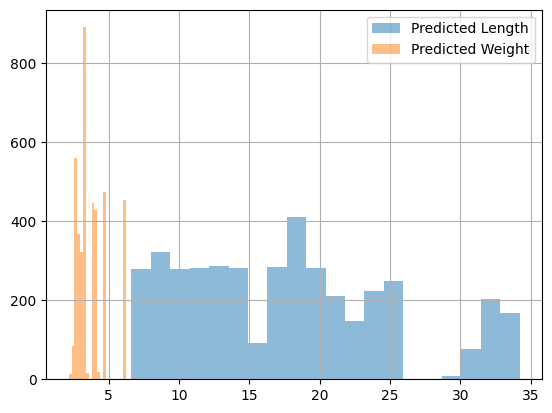

In [54]:
# Plotting the histogram of predicted values for better visualization
predictions_loaded['Predicted_Length'].hist(bins=20, alpha=0.5, label='Predicted Length')
predictions_loaded['Predicted_Weight'].hist(bins=20, alpha=0.5, label='Predicted Weight')
plt.legend()
plt.show()

In [55]:
print("Max Predicted Length:", predictions_loaded['Predicted_Length'].max())
print("Min Predicted Length:", predictions_loaded['Predicted_Length'].min())
print("Max Predicted Weight:", predictions_loaded['Predicted_Weight'].max())
print("Min Predicted Weight:", predictions_loaded['Predicted_Weight'].min())


Max Predicted Length: 34.220104
Min Predicted Length: 6.6220527
Max Predicted Weight: 6.22912
Min Predicted Weight: 2.153087


In [56]:
# Check for predictions inside outliers
outliers_length = predictions_loaded[(predictions_loaded['Predicted_Length'] < 7) | (predictions_loaded['Predicted_Length'] > 30)]
outliers_weight = predictions_loaded[(predictions_loaded['Predicted_Weight'] < 2) | (predictions_loaded['Predicted_Weight'] > 6)]

print("Outliers in Predicted Length:", outliers_length)
print("Outliers in Predicted Weight:", outliers_weight)


Outliers in Predicted Length:       Predicted_Length  Predicted_Weight
1             6.893710          3.304861
16            6.819938          3.312323
22            6.659612          3.384806
24            6.893710          3.304861
35            6.741137          3.355664
...                ...               ...
4075         31.529882          6.180351
4076         30.184772          6.142837
4077         32.874992          6.217864
4078         30.184772          6.142837
4079         32.874992          6.217864

[516 rows x 2 columns]
Outliers in Predicted Weight:       Predicted_Length  Predicted_Weight
3625         32.874992          6.217864
3626         31.529882          6.180351
3627         30.184772          6.142837
3628         30.184772          6.142837
3629         31.529882          6.180351
...                ...               ...
4075         31.529882          6.180351
4076         30.184772          6.142837
4077         32.874992          6.217864
4078         3

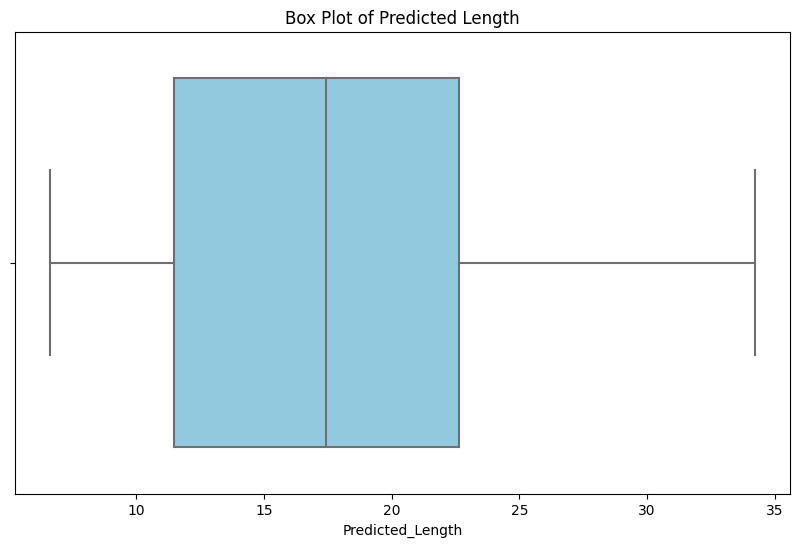

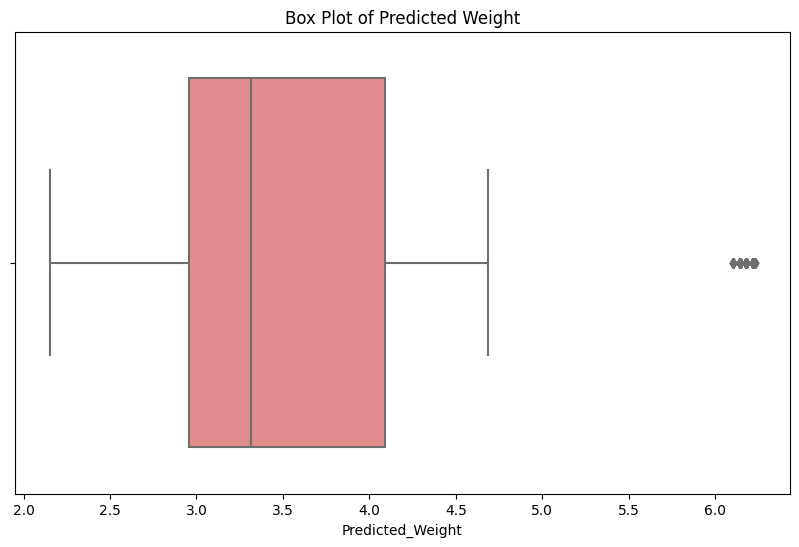

In [57]:
# To visualize the predicted lengths and weights to ensure that they align with expected patterns and to detect any outliers or unusual distributions.

# Plotting box plots for length and weight
plt.figure(figsize=(10, 6))
sns.boxplot(x=predictions_loaded['Predicted_Length'], color='skyblue')
plt.title('Box Plot of Predicted Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=predictions_loaded['Predicted_Weight'], color='lightcoral')
plt.title('Box Plot of Predicted Weight')
plt.show()


In [58]:
# Define threshold ranges for length and weight
length_threshold_min = 7  
length_threshold_max = 30  
weight_threshold_min = 2  
weight_threshold_max = 6  

# Filter out outliers from the dataset
filtered_data = predictions_loaded[
    (predictions_loaded['Predicted_Length'] >= length_threshold_min) &
    (predictions_loaded['Predicted_Length'] <= length_threshold_max) &
    (predictions_loaded['Predicted_Weight'] >= weight_threshold_min) &
    (predictions_loaded['Predicted_Weight'] <= weight_threshold_max)
]

print(filtered_data.head())


   Predicted_Length  Predicted_Weight
0         10.456504          3.345373
2          7.974303          3.299655
3          7.400290          3.307247
4         10.832466          3.331013
5          9.477771          3.348917


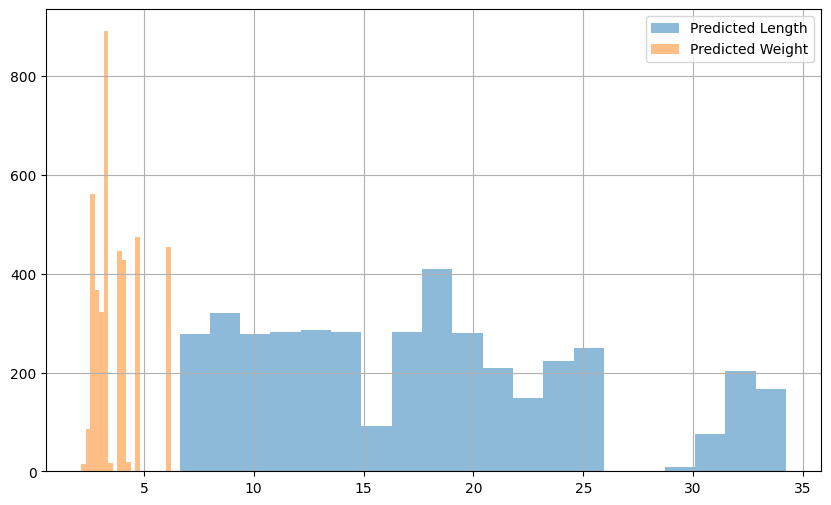

In [60]:
# Plotting histograms for length and weight
plt.figure(figsize=(10, 6))
predictions_loaded['Predicted_Length'].hist(bins=20, alpha=0.5, label='Predicted Length')
predictions_loaded['Predicted_Weight'].hist(bins=20, alpha=0.5, label='Predicted Weight')
plt.legend()
plt.show()


# Simulating New Data

In [ ]:
# Simulating new data by adding random noise to existing features
new_data_simulated = X_test + np.random.normal(0, 0.1, X_test.shape)  # Add noise with mean 0 and standard deviation 0.1

# Scale the simulated data (use the same scaler applied during training)
new_data_simulated_scaled = scaler.transform(new_data_simulated)

# Make predictions on the simulated data
simulated_predicted_length = length_nn_model.predict(new_data_simulated_scaled)
simulated_predicted_weight = weight_nn_model.predict(new_data_simulated_scaled)

print("Simulated Predicted Length:", simulated_predicted_length[:5])  # First 5 predictions
print("Simulated Predicted Weight:", simulated_predicted_weight[:5])  # First 5 predictions

In [ ]:
# Generate simulated data with a normal distribution for length and weight
simulated_length = np.random.normal(loc=17.32, scale=7.08, size=100)  # Generate 100 new lengths (mean, std, size)
simulated_weight = np.random.normal(loc=3.78, scale=1.03, size=100)  # Generate 100 new weights (mean, std, size)

# Create a new DataFrame for simulated data
simulated_data = pd.DataFrame({
    'Predicted_Length': simulated_length,
    'Predicted_Weight': simulated_weight
})

print(simulated_data.head())

In [ ]:
# Plot histograms to check the distribution of simulated data
plt.figure(figsize=(10, 6))
plt.hist(simulated_length, bins=20, alpha=0.5, label='Simulated Length')
plt.hist(simulated_weight, bins=20, alpha=0.5, label='Simulated Weight')
plt.legend()
plt.show()

In [ ]:
# Evaluate the predictions (compare predicted vs simulated data)
mse_simulated_length = mean_squared_error(simulated_length, simulated_predicted_length)
mse_simulated_weight = mean_squared_error(simulated_weight, simulated_predicted_weight)

print(f"MSE for Simulated Length Prediction: {mse_simulated_length}")
print(f"MSE for Simulated Weight Prediction: {mse_simulated_weight}")